In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'                           #displays only a warning or error

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.datasets import mnist                        #database library MNIST
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()           #load data

In [3]:
X_train, y_train

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [4]:
#standardization of input data: b/w shades - a total of 255 gradations, a total of 10 possible outputs
X_train = X_train / 255
X_test = X_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

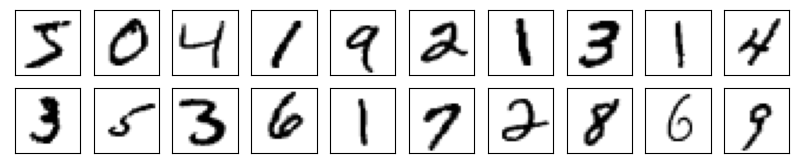

In [15]:
#displaying the first 20 images from the training data
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

In [16]:
model = keras.Sequential([                                          #forming the structure of NN
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [17]:
print(model.summary())                                              #output of NN structure to the console

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.3)
model.evaluate(X_test, y_test_cat)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3024 - accuracy: 0.9145 - val_loss: 0.1739 - val_accuracy: 0.9497
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1331 - accuracy: 0.9612 - val_loss: 0.1286 - val_accuracy: 0.9613
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.1106 - val_accuracy: 0.9678
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.1119 - val_accuracy: 0.9675
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.1045 - val_accuracy: 0.9687
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 0.0976 - val_accuracy: 0.9715
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0942 - val_accuracy:

[0.08735759556293488, 0.9731000065803528]

1/1 [==============================] - 0s 74ms/step
[[8.0552596e-12 9.3879760e-07 9.9999905e-01 1.8190441e-08 9.6596787e-19
  2.1418506e-11 1.9533751e-11 2.7900197e-17 5.2839681e-08 4.7104895e-16]]
2


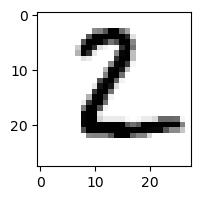

In [20]:
n = 1                                         #predict and output, for example, the 1st element from the test data
x = np.expand_dims(X_test[n], axis=0)
res = model.predict(x)
print(res)
print(np.argmax(res))

plt.figure(figsize=(2,2))
plt.imshow(X_test[n], cmap=plt.cm.binary)
plt.show()

In [21]:
pred = model.predict(X_test)                                   #recognition of all test data
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [22]:
mask = pred == y_test                                          #selecting incorrect results
print(mask[:100])

x_false = X_test[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
(269, 28, 28)


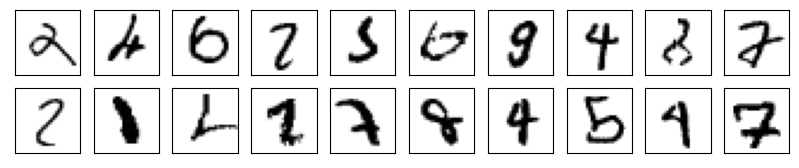

In [23]:
plt.figure(figsize=(10,10))                                     #output of the first 25 incorrect results
for i in range(20):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()